Step 1: Load and Preprocess Dataset

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)


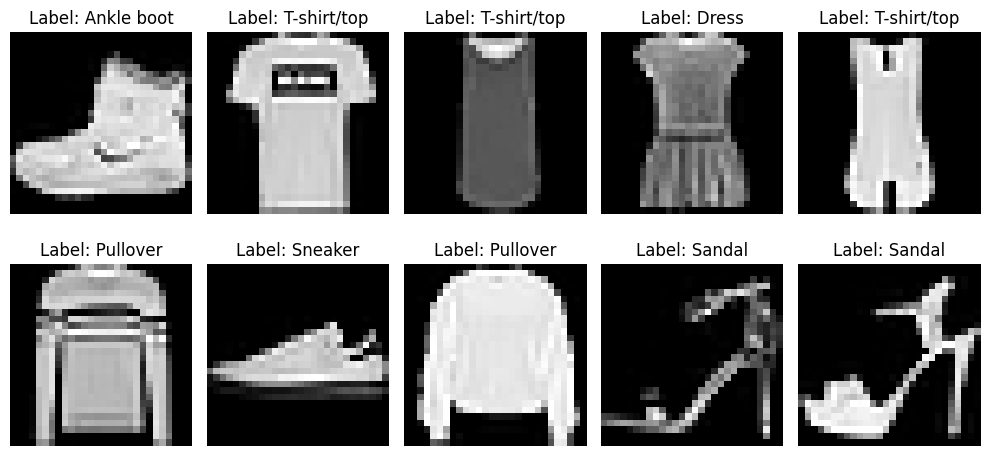

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explore dataset
print(f"Training data shape: {train_images.shape}, Test data shape: {test_images.shape}")

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Visualize sample images
plt.figure(figsize=(10, 5))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {class_names[np.argmax(train_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Step 2: Define the CNN Model


In [2]:
from keras import models, layers

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

Step 3: Data Augmentation


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(train_images)


Step 4: Train the Model


In [4]:
# Train the model with augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=15,
                    validation_data=(test_images, test_labels))


Epoch 1/15
938/938 [==============================] - 86s 90ms/step - loss: 0.6887 - accuracy: 0.7478 - val_loss: 0.4304 - val_accuracy: 0.8342
Epoch 2/15
938/938 [==============================] - 76s 81ms/step - loss: 0.5032 - accuracy: 0.8149 - val_loss: 0.3925 - val_accuracy: 0.8551
Epoch 3/15
938/938 [==============================] - 76s 81ms/step - loss: 0.4459 - accuracy: 0.8365 - val_loss: 0.4047 - val_accuracy: 0.8585
Epoch 4/15
938/938 [==============================] - 75s 80ms/step - loss: 0.4142 - accuracy: 0.8485 - val_loss: 0.4048 - val_accuracy: 0.8422
Epoch 5/15
938/938 [==============================] - 75s 80ms/step - loss: 0.3900 - accuracy: 0.8598 - val_loss: 0.3709 - val_accuracy: 0.8634
Epoch 6/15
938/938 [==============================] - 75s 80ms/step - loss: 0.3758 - accuracy: 0.8639 - val_loss: 0.3281 - val_accuracy: 0.8764
Epoch 7/15
938/938 [==============================] - 75s 80ms/step - loss: 0.3646 - accuracy: 0.8666 - val_loss: 0.3762 - val_accuracy:

Step 5: Evaluate and Visualize Results


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 [==============================] - 3s 9ms/step - loss: 0.2867 - accuracy: 0.8929
Test Accuracy: 0.89


Visualize Training Progress



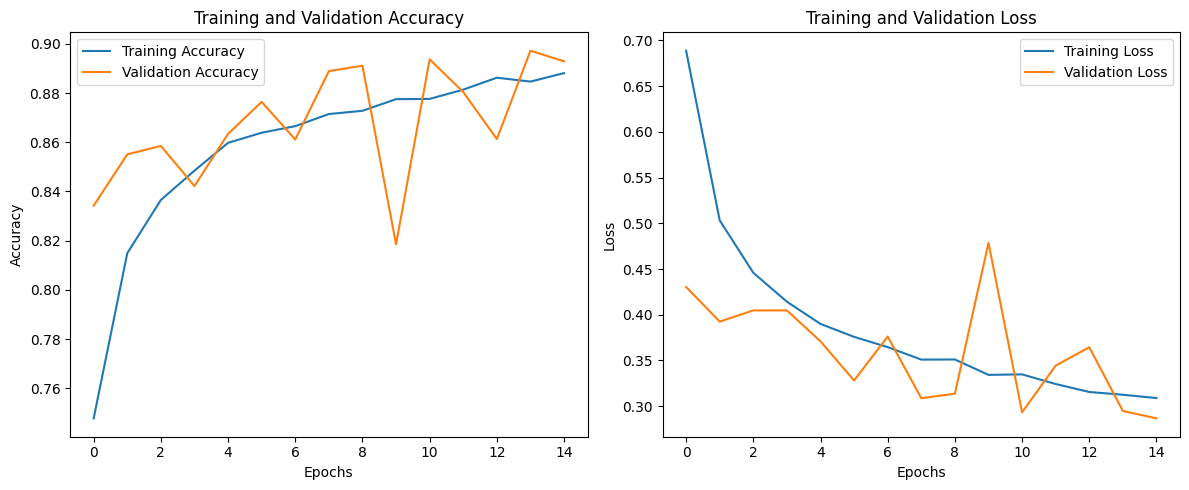

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Confusion Matrix



313/313 [==============================] - 3s 9ms/step


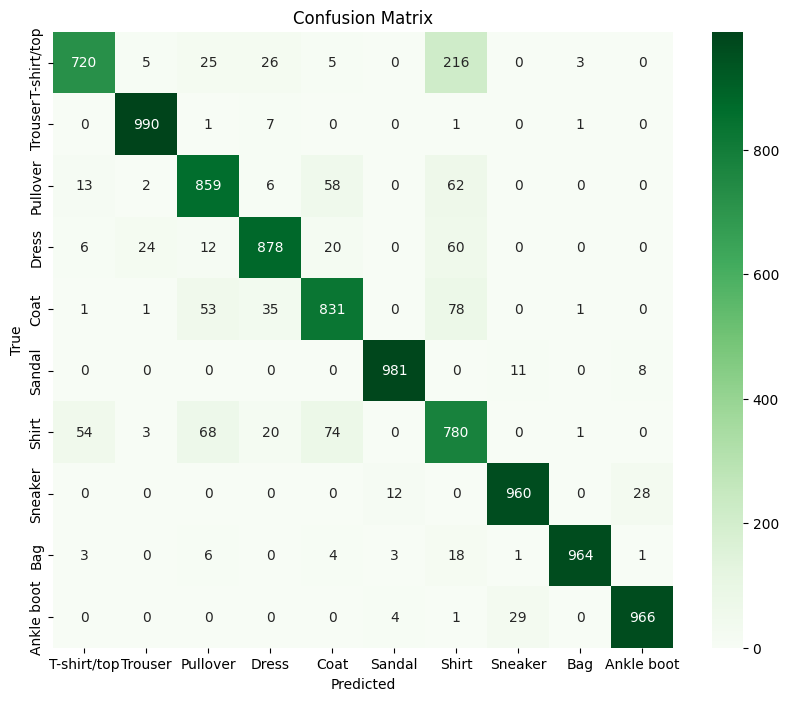

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.90      0.72      0.80      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.84      0.83      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.64      0.78      0.70      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))


Visualize Predictions



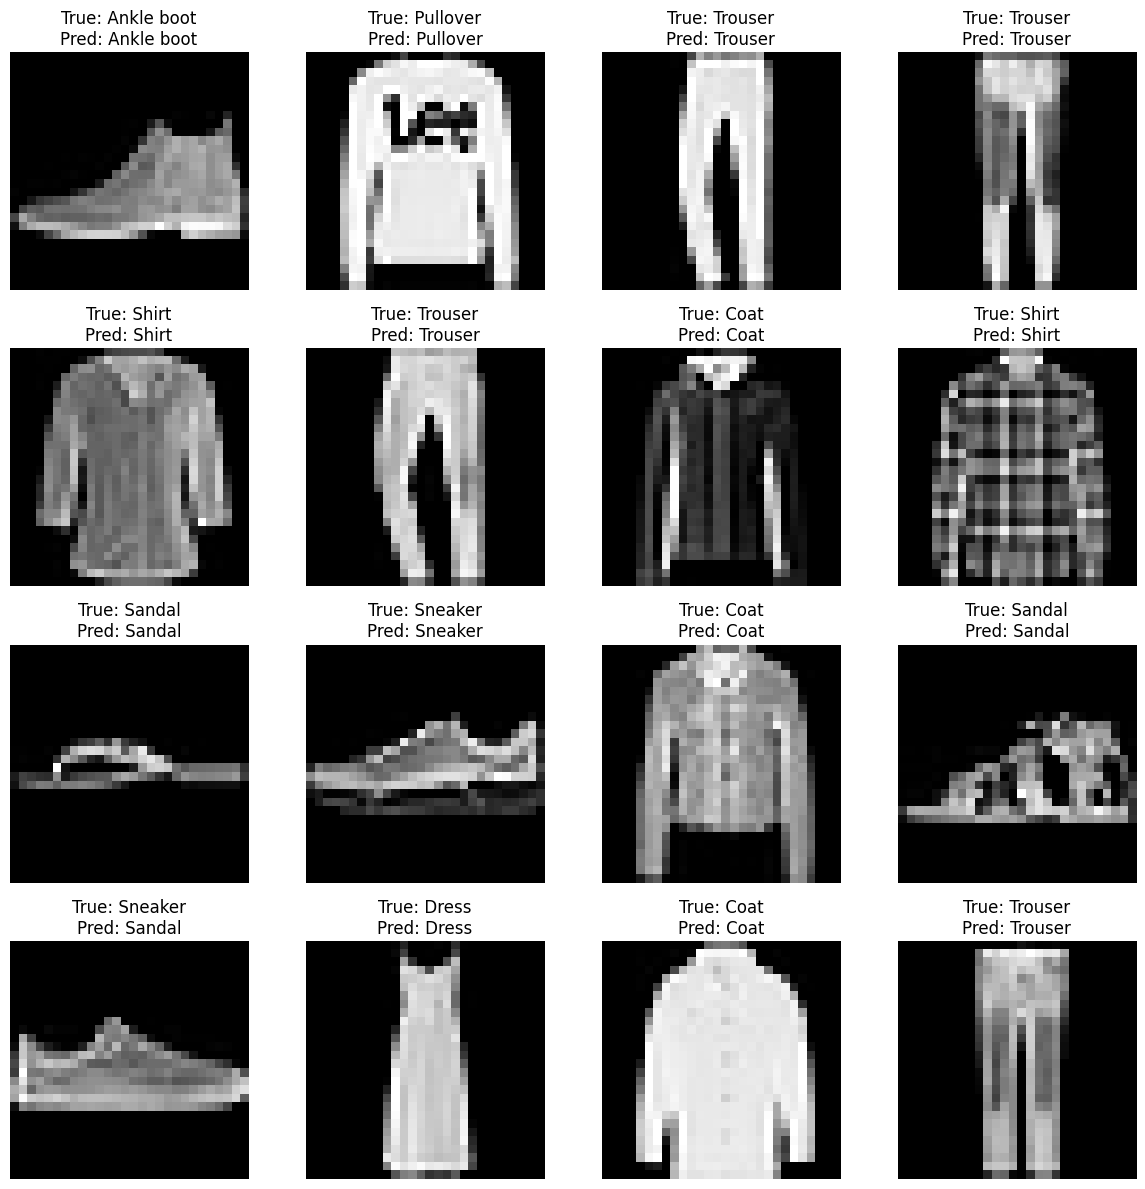

In [8]:
# Visualize some test predictions
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
